# **Tutoriel sklearn**

**1-Purchase and plot data**

In [1]:
import numpy as np
from matplotlib import pyplot
from sklearn import model_selection, metrics
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
data = np.loadtxt('dataset.dat')

data.shape

(300, 3)

In [2]:
# Separate observations from labels
X = data[:,0:2]
Y = data[:,2]
Y = Y.astype(int)

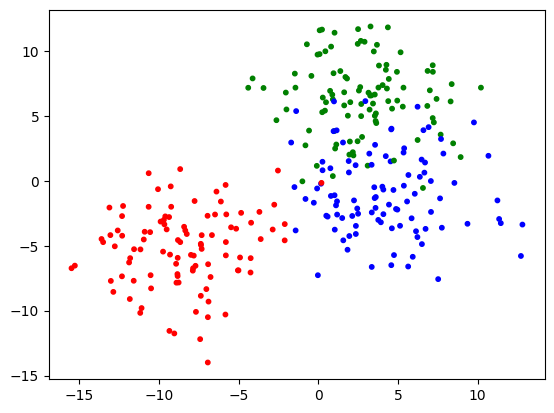

In [3]:
# Plot data
colors = np.array([x for x in "rgbmyk"])
pyplot.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=10)
pyplot.show()

**2-Train and evaluate model**

In [4]:
# Partition the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.7, test_size=0.3)

In [5]:
# Select and train model (KNN)
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
one_NN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [9]:
# Score based on training
print('Accuracy on training set:', one_NN.score(X_train, y_train))
print('Accuracy on test set:', one_NN.score(X_test, y_test))

print("""
  On se rend bien compte du gap entre les deux taux,
  neanmoins, on peut conclure que le taux de reconnaissance sur le dataset de test est pas mauvais
""")

Accuracy on training set: 1.0
Accuracy on test set: 0.8555555555555555

  On se rend bien compte du gap entre les deux taux, 
  neanmoins, on peut conclure que le taux de reconnaissance sur le dataset de test est pas mauvais



In [10]:
# Confusion Matrix
y_pred = one_NN.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[18,  0,  1],
       [ 0, 28,  6],
       [ 0,  6, 31]])

In [11]:
# Create crid
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1

x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50

xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h), np.arange(y_min, y_max, y_h))

Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)

<ipython-input-12-ecfe4e989347>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pyplot.scatter(X_train[:, 0], X_train[:, 1], cmap=pyplot.cm.Paired, color=colors[y_train].tolist())


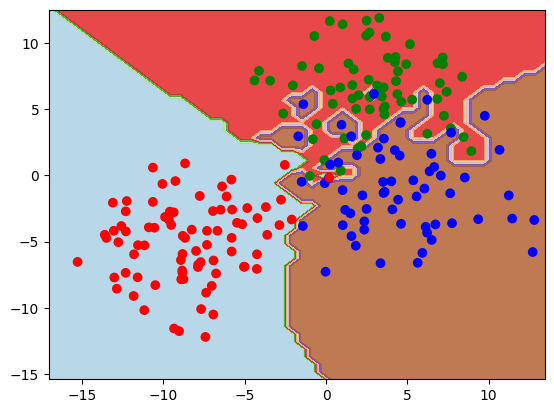

In [12]:
# Show frontiers/train data
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_train[:, 0], X_train[:, 1], cmap=pyplot.cm.Paired, color=colors[y_train].tolist())

pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())

pyplot.show()

<ipython-input-13-3c3e16fb0c1c>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pyplot.scatter(X_test[:, 0], X_test[:, 1], cmap=pyplot.cm.Paired, color=colors[y_test].tolist())


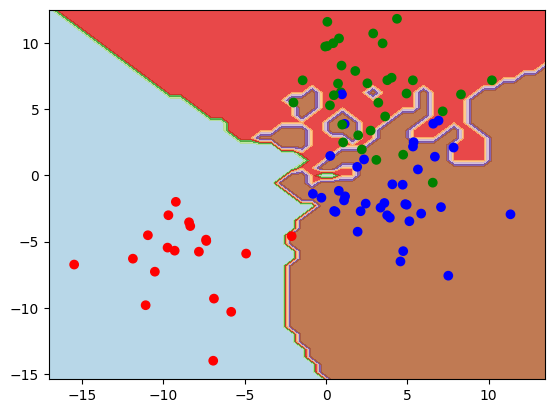

In [13]:
# Show frontiers/test data
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_test[:, 0], X_test[:, 1], cmap=pyplot.cm.Paired, color=colors[y_test].tolist())

pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())

pyplot.show()

**3-Change parameters**

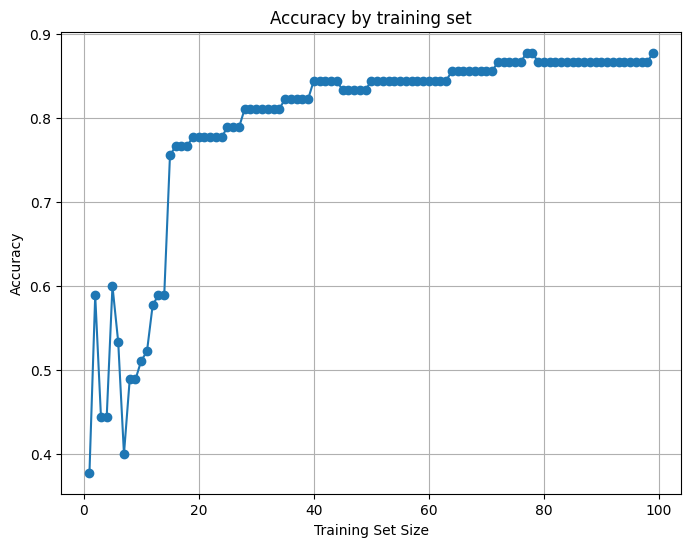


  On se rend bien compte que de maniére générale, plus la taille du dataset 
  d'entraînement augmente et plus métrique Accuracy est meilleur.



In [20]:
# Result of train set lengh
max_size = X_train.shape[0]
acc = []

for size in range(1, 100):
  X_train1, temp1, y_train1, temp2 = model_selection.train_test_split(
      X_train, y_train, train_size=size/max_size, random_state=42
  )
  one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
  one_NN.fit(X_train1, y_train1)
  acc.append(one_NN.score(X_test, y_test))

pyplot.figure(figsize=(8, 6))
pyplot.plot([x for x in range(1, 100)], acc, marker='o', linestyle='-')
pyplot.xlabel('Training Set Size')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy by training set')
pyplot.grid()
pyplot.show()

print("""
  On se rend bien compte que de maniére générale, plus la taille du dataset
  d'entraînement augmente et plus métrique Accuracy est meilleur.
""")

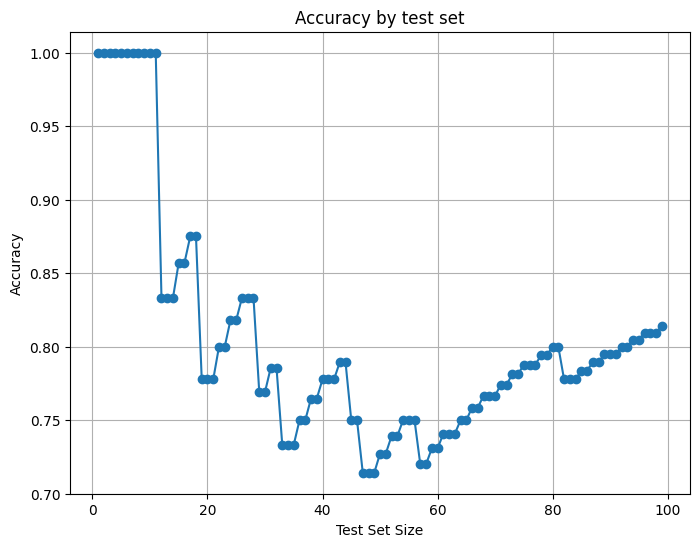


  On se rend bien compte que de maniére générale, plus la taille du dataset 
  de test augmente et plus métrique Accuracy fluctue avec une tendance a 
  baisser. Mais par la suite augmente de nouveau.

  On peut donc conclure que :
    - Petit dataset de test: grande variance des predictions (❌)
    - Grand dataset de test: Faible variance des predictions (✅)



In [32]:
# Result of train set lengh
max_size = X_train.shape[0]
acc = []

for size in range(1, 100):
  temp1, X_test1, temp2, y_test1 = model_selection.train_test_split(
      X_test, y_test, test_size=size/max_size, random_state=42
  )
  one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
  one_NN.fit(X_train, y_train)
  acc.append(one_NN.score(X_test1, y_test1))

pyplot.figure(figsize=(8, 6))
pyplot.plot([x for x in range(1, 100)], acc, marker='o', linestyle='-')
pyplot.xlabel('Test Set Size')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy by test set')
pyplot.grid()
pyplot.show()

print("""
  On se rend bien compte que de maniére générale, plus la taille du dataset
  de test augmente et plus métrique Accuracy fluctue avec une tendance a
  baisser. Mais par la suite augmente de nouveau.

  On peut donc conclure que :
    - Petit dataset de test: grande variance des predictions (❌)
    - Grand dataset de test: Faible variance des predictions (✅)
""")

**4-Figure out K-ppv**

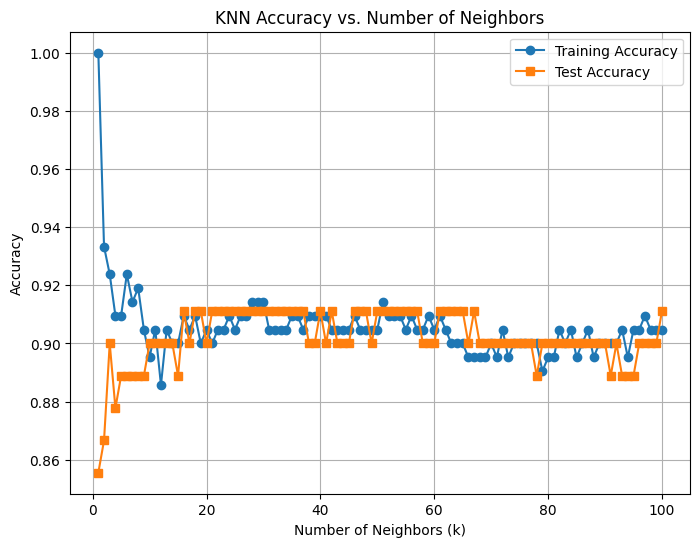


  - La valeur de K qui minimise l'erreur en test est: 17



In [79]:
# Change K from 1 to Kmax and observe changes

kmax = 100

train_acc = []
test_acc = []
k_values = range(1, kmax + 1)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, y_train)

    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

# Plot accuracy vs. k
pyplot.figure(figsize=(8, 6))
pyplot.plot(k_values, train_acc, marker='o', linestyle='-', label='Training Accuracy')
pyplot.plot(k_values, test_acc, marker='s', linestyle='-', label='Test Accuracy')
pyplot.xlabel('Number of Neighbors (k)')
pyplot.ylabel('Accuracy')
pyplot.title('KNN Accuracy vs. Number of Neighbors')
pyplot.legend()
pyplot.grid()
pyplot.show()

k_star = k_values[np.argmax(test_acc)]

print("""
  - La valeur de K qui minimise l'erreur en test est: 17
""")

In [80]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X_data, y, title, h=0.02):
    """
    Plots the decision boundary for a trained classifier.

    Parameters:
    - model: Trained classifier
    - X_data: Feature matrix (only first 2 features used)
    - y: Labels
    - title: Title for the plot
    - h: Step size for mesh grid
    """

    # Define color maps for visualization
    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])  # Background colors
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])  # Data point colors

    # Use only the first two features
    X_data = X_data[:, :2]

    # Create a mesh grid
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class labels for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    pyplot.figure(figsize=(8, 6))
    pyplot.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Plot training data points
    scatter = pyplot.scatter(X_data[:, 0], X_data[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=50)
    pyplot.xlabel("Feature 1")
    pyplot.ylabel("Feature 2")
    pyplot.title(title)

    # Fix the legend issue
    unique_classes = np.unique(y)
    legend_labels = [f"Class {int(cls)}" for cls in unique_classes]  # Convert to string labels
    pyplot.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Classes")

    pyplot.show()

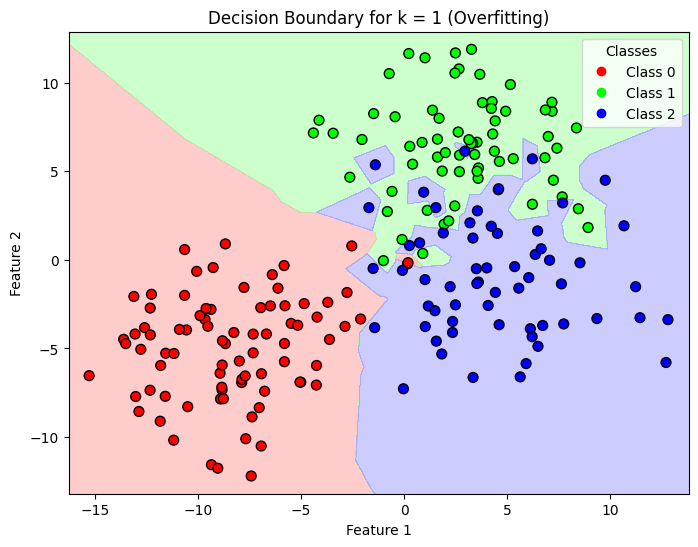

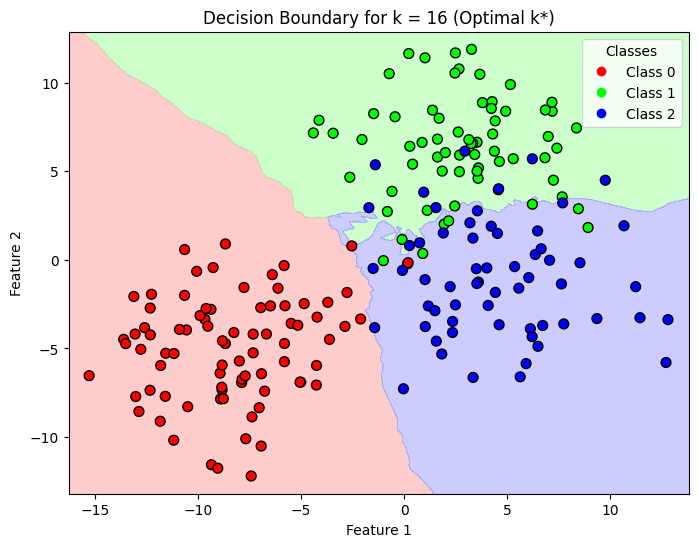

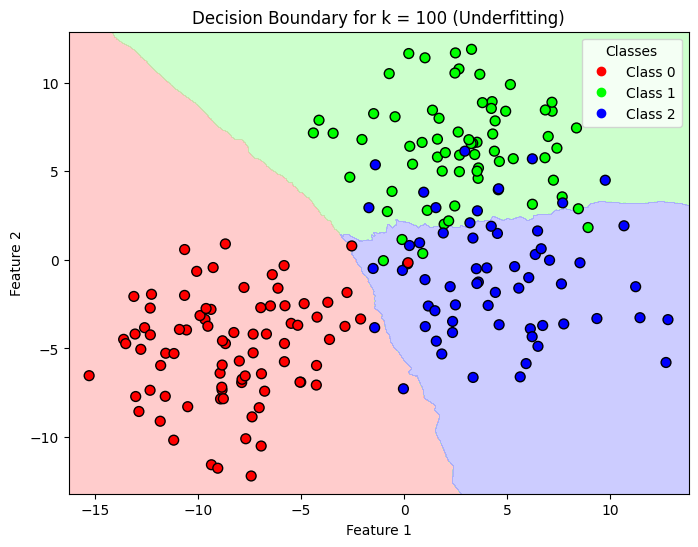

In [81]:
"""
Show decision frontiers for :
  - k = 1,
  - k = 10,
  - k= 100;
"""

knn_k1 = KNeighborsClassifier(n_neighbors=1, algorithm='brute').fit(X_train, y_train)
knn_kstar = KNeighborsClassifier(n_neighbors=k_star, algorithm='brute').fit(X_train, y_train)
knn_kmax = KNeighborsClassifier(n_neighbors=kmax, algorithm='brute').fit(X_train, y_train)

plot_decision_boundary(knn_k1, X_train, y_train, "Decision Boundary for k = 1 (Overfitting)")
plot_decision_boundary(knn_kstar, X_train, y_train, f"Decision Boundary for k = {k_star} (Optimal k*)")
plot_decision_boundary(knn_kmax, X_train, y_train, f"Decision Boundary for k = {kmax} (Underfitting)")

In [83]:
print(
    """
    Conclusion sur l'impact de k sur la forme des frontières:
      - k = 1 : Les frontièrees ne sont pas très bien délimitées
      - k = 17 : Les frontières sont un mieux délimitées
      - k = 100 : Les frontières sont très bien délimitées
    """
)


    Conclusion sur l'impact de k sur la forme des frontières:
      - k = 1 : Les frontièrees ne sont pas très bien délimitées
      - k = 17 : Les frontières sont un mieux délimitées
      - k = 100 : Les frontières sont très bien délimitées
    


**Biais-variance**

*   Biais élevé → Modèle trop simple (underfitting).
*   Variance élevée → Modèle trop complexe (overfitting).
*   Compromis biais-variance → Trouver le bon équilibre pour minimiser l'erreur totale.


**Conclusion biais-variance pour les differents K étudiés**

*   K = 1: Variance élevée et biais faible donc surapprentissage;

*   K = 100 : Variance faible et Biais élevé donc sous-apprentissage;

*   K = 17: Compromis entre Biais et Variance donc le modèle est plutôt bon.



**Protocole**

Le protocole mis en place pour regler le paramètre K est satisfaisant car le score est élevé.

In [84]:
knn_kstar.score(X_test, y_test)

0.9111111111111111